## Assignment

In this assignment, you'll continue working with the Students Performance in Exams dataset from Kaggle. You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

postgres_user = 'dsbc_student'<br>
postgres_pw = '7\*.8G9QH21'<br>
postgres_host = '142.93.121.174'<br>
postgres_port = '5432'<br>
postgres_db = 'studentsperformance'<br>

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?
2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.
3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?


In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
from scipy.stats import zscore



warnings.filterwarnings('ignore')

In [170]:


postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'


engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))


edu_df = pd.read_sql_query('select * from studentsperformance',con=engine)

engine.dispose()

In [171]:
edu_df.columns


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

## 1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?


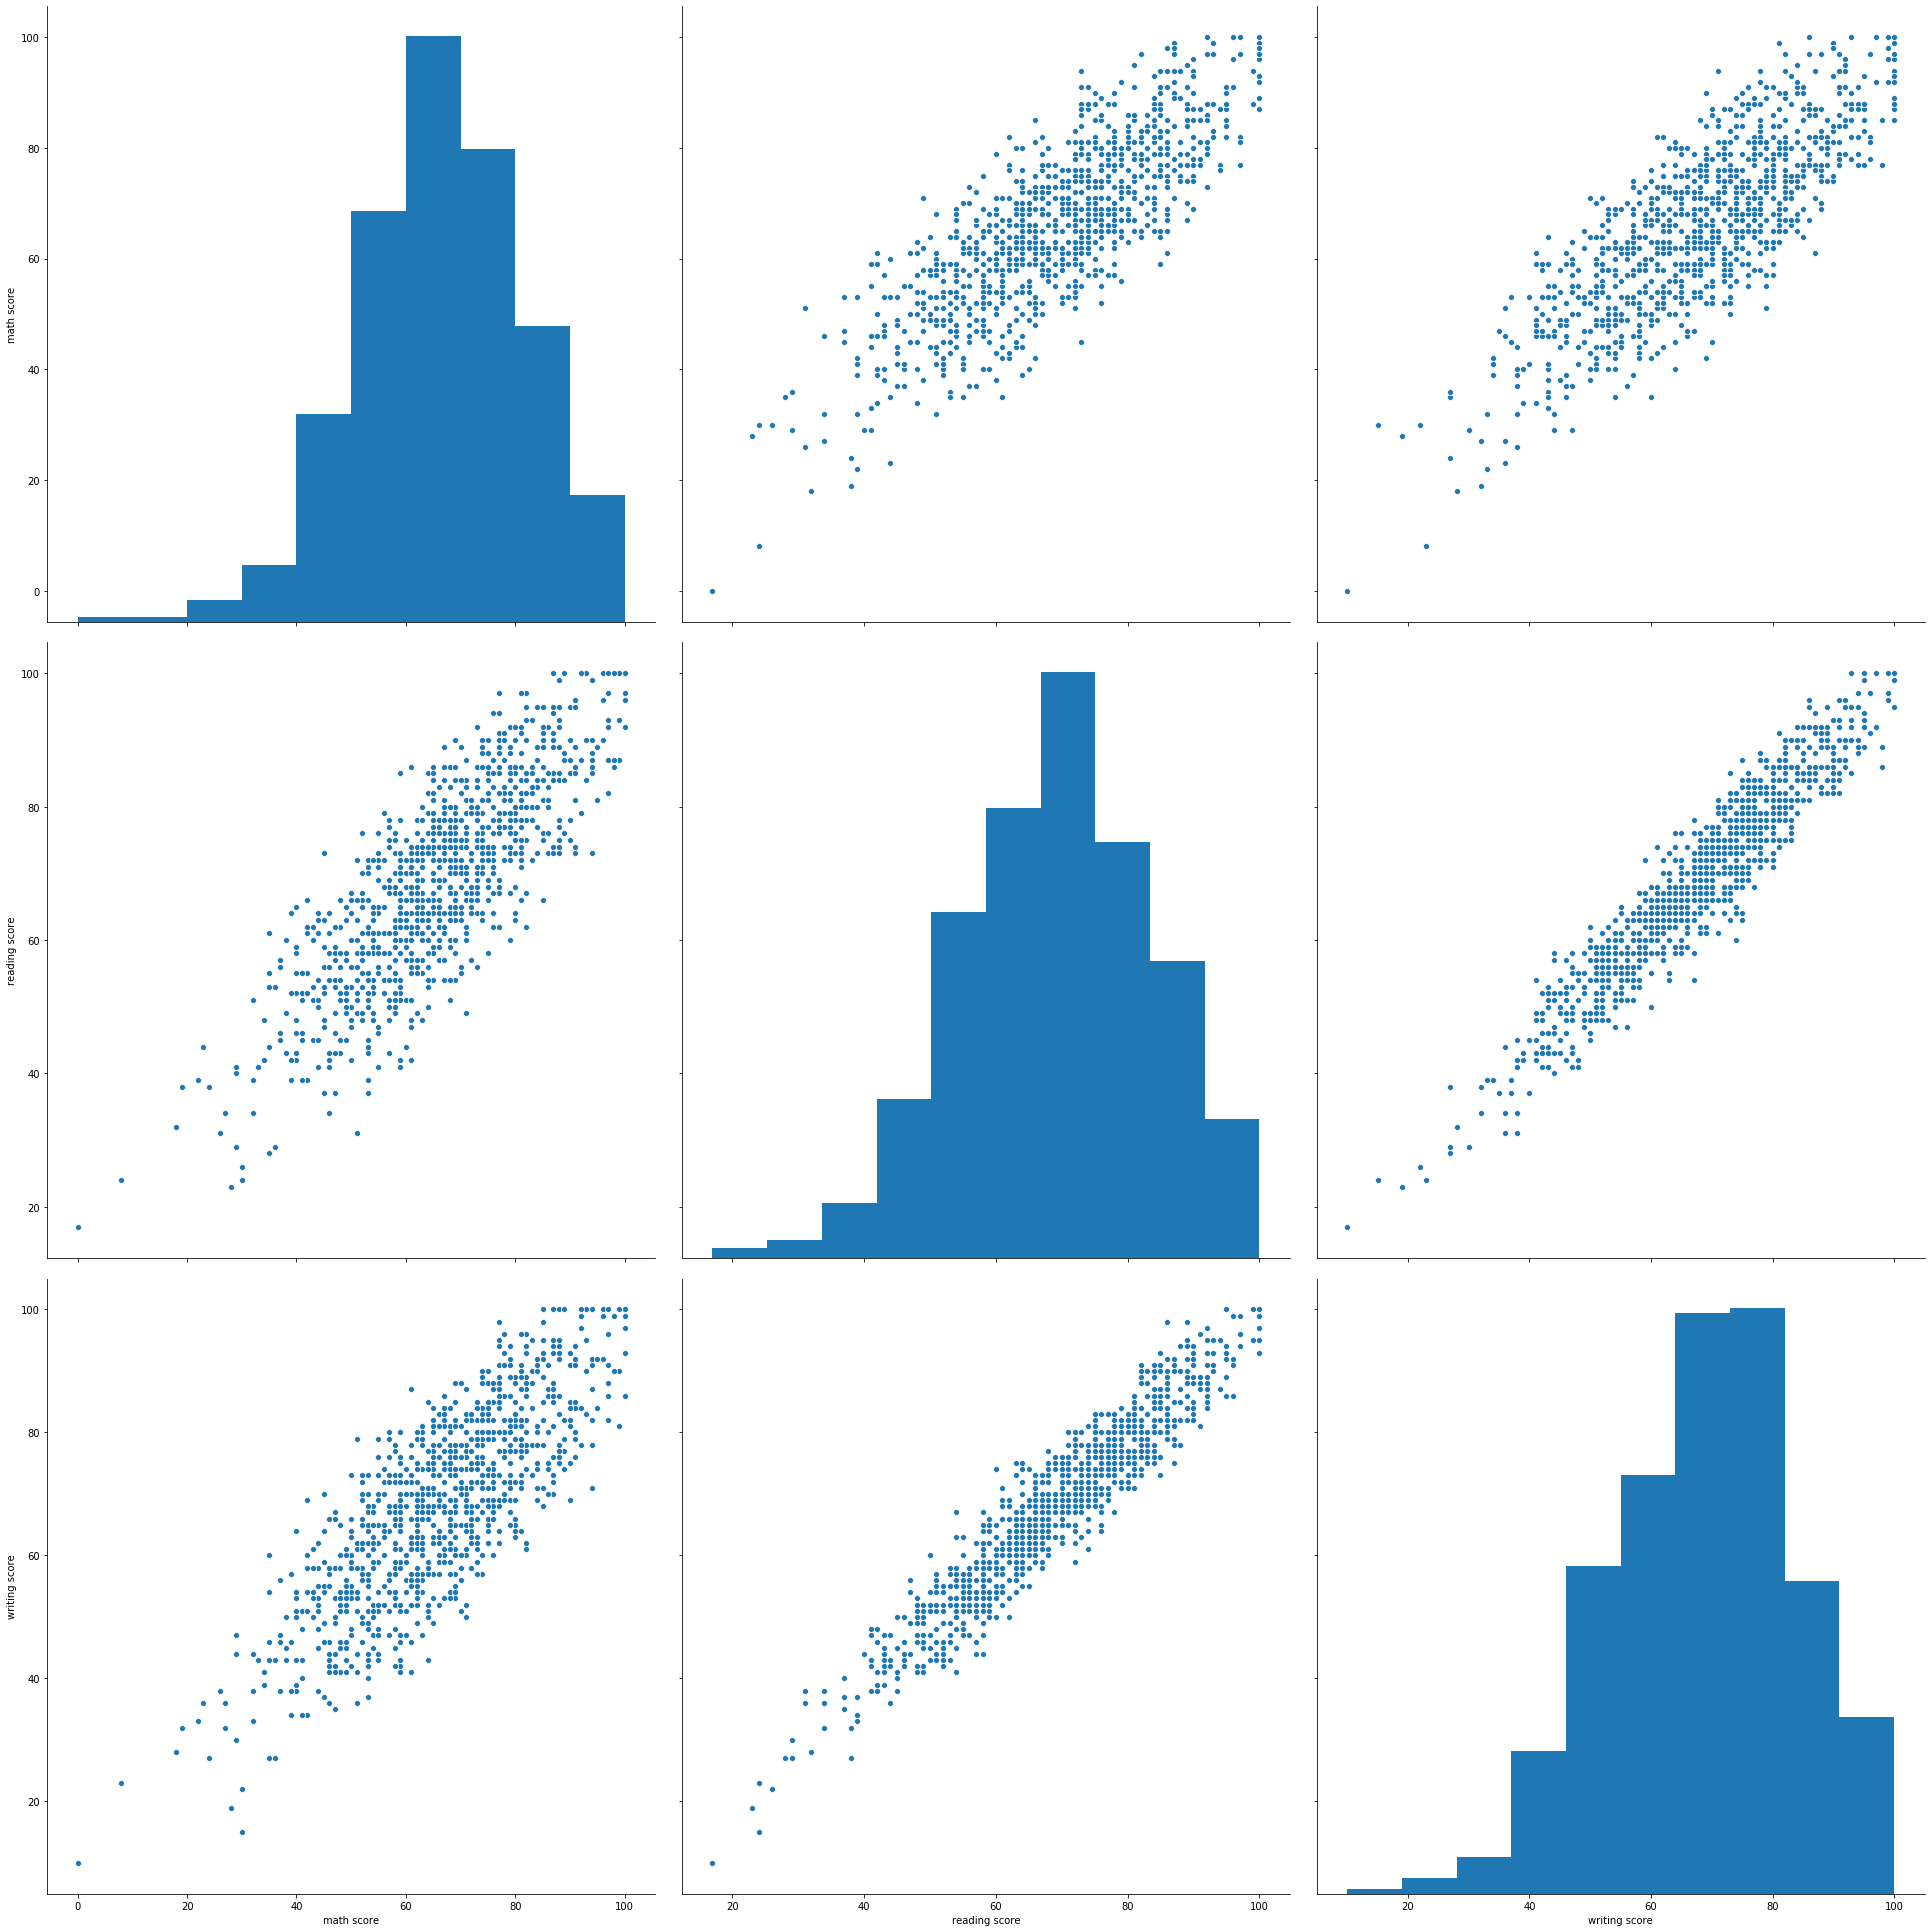

In [172]:
sns.pairplot(edu_df,height=9)


In [173]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(edu_df["math score"])
norm_stats = normaltest(edu_df["math score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(edu_df["reading score"])
norm_stats = normaltest(edu_df["reading score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(edu_df["writing score"])
norm_stats = normaltest(edu_df["writing score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistics is 15.408960513931822 and p value is 0.00045080293869937836
Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582
Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974


the Jarque-Bera test shows p values near zero 

In [174]:
#edu_df = edu_df.replace(0, np.nan)
#edu_df = edu_df.dropna(how='all', axis=0)
#edu_df = edu_df.replace(np.nan, 0)
#edu_df.describe()

In [175]:
#edu_df.loc[edu_df[lambda edu_df: edu_df['math score']==0]].drop(axis=0)

In [176]:

#edu_df['math score'] = edu_df['math score'].replace(0, np.nan)
#edu_df = edu_df.dropna

#edu_df.describe()

In [184]:
from scipy.stats import boxcox

edu_df['reading_boxcox'],_ = boxcox(edu_df["reading score"])
math_boxcox = boxcox(edu_df[edu_df["math score"] > 0])
edu_df['writing_boxcox'],_ = boxcox(edu_df["writing score"])

plt.figure(figsize=(18,5))

#histograms of the box-cox transformed data
plt.subplot(1, 3, 1)
plt.hist(math_boxcox)
plt.title("histogram of Math Scores (box-cox transformed)")

plt.subplot(1, 3, 2)
plt.hist(edu_df['reading_boxcox'])
plt.title("histogram of REAding Scores (box-cox transformed)")

plt.subplot(1, 3, 3)
plt.hist(edu_df['writing_boxcox'])
plt.title("histogram of Writing Scores (box-cox transformed)")

plt.show()

from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(edu_df['math_boxcox'])
norm_stats = normaltest(edu_df['math_boxcox'])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(edu_df['reading_boxcox'])
norm_stats = normaltest(edu_df['reading_boxcox'])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(edu_df['writing_boxcox'])
norm_stats = normaltest(edu_df['writing_boxcox'])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))



TypeError: '<=' not supported between instances of 'str' and 'int'

it seems that the transformations worked really well for the reading an writing scores however the math score had zero values that needed to be removed and afte rthe transfromation seems less normal than before 

## 2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.


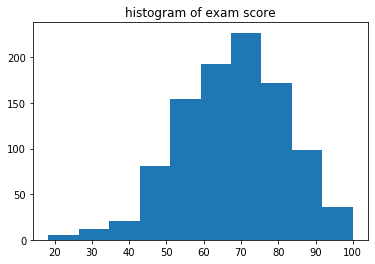

Jarque-Bera test statistics is nan and p value is nan
Normality test statistics is nan and p value is nan


In [166]:

exam_score = (edu_df["math score"] +
              edu_df["reading score"] + edu_df["writing score"])/3

plt.hist(exam_score)
plt.title("histogram of exam score")
plt.show()

jb_stats = jarque_bera(exam_score)
norm_stats = normaltest(exam_score)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


In [196]:
edu_df["parental level of education"].unique()


array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

## 3.Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

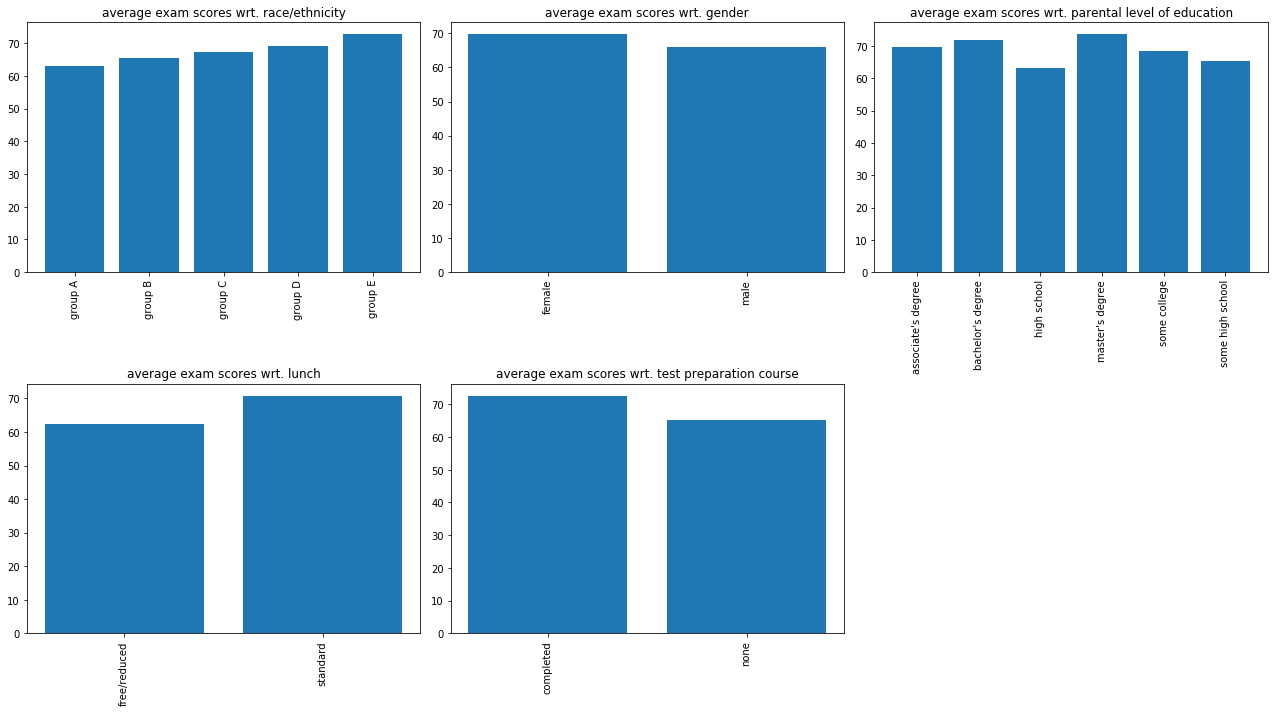

In [201]:
edu_df["exam_score"] = exam_score 

plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
plt.bar(edu_df.groupby("race/ethnicity")
        ["exam_score"].mean().index, edu_df.groupby("race/ethnicity")["exam_score"].mean())

plt.title("average exam scores wrt. race/ethnicity")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 2)
plt.bar(edu_df.groupby("gender")
        ["exam_score"].mean().index, edu_df.groupby("gender")["exam_score"].mean())

plt.title("average exam scores wrt. gender")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 3)
plt.bar(edu_df.groupby("parental level of education")
        ["exam_score"].mean().index, edu_df.groupby("parental level of education")["exam_score"].mean())

plt.title("average exam scores wrt. parental level of education")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 4)
plt.bar(edu_df.groupby("lunch")
        ["exam_score"].mean().index, edu_df.groupby("lunch")["exam_score"].mean())

plt.title("average exam scores wrt. lunch")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 5)
plt.bar(edu_df.groupby("test preparation course")
        ["exam_score"].mean().index, edu_df.groupby("test preparation course")["exam_score"].mean())

plt.title("average exam scores wrt. test preparation course")
plt.xticks(rotation="vertical")

plt.tight_layout()
plt.show()

they all seem to have some effect on test scores with the exception of parental education level where some highschool has higher results than having a highschool degree. 
